In [70]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import plotly as py
import chart_studio.plotly as pyc
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
import geopandas
import shapefile as shp

In [2]:
#Using pandas to import my .csv file into python.
df = pd.read_csv (r'/Users/roryadair/Desktop/Springboard/Capstone/II/Metro_ZORI_AllHomesPlusMultifamily_Smoothed.csv')
df2 = pd.read_excel (r'/Users/roryadair/Desktop/Springboard/Capstone/II/MetroMedianIncome.xlsx')
df3 = pd.read_excel (r'/Users/roryadair/Desktop/Springboard/Capstone/II/MedianIncome2014-2021.xlsx')
df4 = pd.read_excel (r'/Users/roryadair/Desktop/Springboard/Capstone/II/rent3.xlsx')
df5 = pd.read_excel (r'/Users/roryadair/Desktop/Springboard/Capstone/II/rent5.xlsx')

print(df)
print(df2)
print(df3)
print(df4)
print(df5)

     RegionID                          RegionName  SizeRank  2014-01  2014-02  \
0      102001                       United States         0   1325.0   1331.0   
1      394913                        New York, NY         1   2282.0   2300.0   
2      753899  Los Angeles-Long Beach-Anaheim, CA         2   1735.0   1761.0   
3      394463                         Chicago, IL         3   1413.0   1423.0   
4      394514               Dallas-Fort Worth, TX         4   1134.0   1127.0   
..        ...                                 ...       ...      ...      ...   
101    394995                  Port St. Lucie, FL       119   1240.0   1279.0   
102    394602                    Fort Collins, CO       159   1172.0   1182.0   
103    394405                         Boulder, CO       162   1512.0   1420.0   
104    394645                         Greeley, CO       177   1202.0   1146.0   
105    394623                     Gainesville, GA       229    925.0    927.0   

     2014-03  2014-04  2014

# Data Cleansing

In [3]:
#Using pandas .melt feature to reformat the dataframe. I want to turn the column headings that are left after
#'SizeRank' into a column named 'Date'.
df=df.melt(['RegionID','RegionName','SizeRank'], var_name='Date')

df

,RegionID,RegionName,SizeRank,Date,value
0,102001,United States,0,2014-01,1325.0
1,394913,"New York, NY",1,2014-01,2282.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,2014-01,1735.0
3,394463,"Chicago, IL",3,2014-01,1413.0
4,394514,"Dallas-Fort Worth, TX",4,2014-01,1134.0
...,...,...,...,...,...
9111,394995,"Port St. Lucie, FL",119,2021-02,1938.0
9112,394602,"Fort Collins, CO",159,2021-02,1671.0
9113,394405,"Boulder, CO",162,2021-02,2094.0
9114,394645,"Greeley, CO",177,2021-02,1677.0


In [4]:
#Rename the 'value' column to 'Amount' for clarity.
df=df.rename(columns={'value':'Amount'}, inplace=False)

df

,RegionID,RegionName,SizeRank,Date,Amount
0,102001,United States,0,2014-01,1325.0
1,394913,"New York, NY",1,2014-01,2282.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,2014-01,1735.0
3,394463,"Chicago, IL",3,2014-01,1413.0
4,394514,"Dallas-Fort Worth, TX",4,2014-01,1134.0
...,...,...,...,...,...
9111,394995,"Port St. Lucie, FL",119,2021-02,1938.0
9112,394602,"Fort Collins, CO",159,2021-02,1671.0
9113,394405,"Boulder, CO",162,2021-02,2094.0
9114,394645,"Greeley, CO",177,2021-02,1677.0


In [5]:
#Drop the first entry 'United States'.
df=df.drop([0,0])

df

,RegionID,RegionName,SizeRank,Date,Amount
1,394913,"New York, NY",1,2014-01,2282.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,2014-01,1735.0
3,394463,"Chicago, IL",3,2014-01,1413.0
4,394514,"Dallas-Fort Worth, TX",4,2014-01,1134.0
5,394974,"Philadelphia, PA",5,2014-01,1287.0
...,...,...,...,...,...
9111,394995,"Port St. Lucie, FL",119,2021-02,1938.0
9112,394602,"Fort Collins, CO",159,2021-02,1671.0
9113,394405,"Boulder, CO",162,2021-02,2094.0
9114,394645,"Greeley, CO",177,2021-02,1677.0


In [6]:
df2.index = df2.index + 1

df2

,RegionName,MedianIncome
1,"New York, NY",63998
2,"Los Angeles-Long Beach-Anaheim, CA",68044
3,"Chicago, IL",58247
4,"Dallas-Fort Worth, TX",59607
5,"Philadelphia, PA",45927
...,...,...
101,"Port St. Lucie, FL",60587
102,"Fort Collins, CO",65866
103,"Boulder, CO",69520
104,"Greeley, CO",57586


In [7]:
#identify percentiles in order to place rows into Low, Medium, and High bins
pd.qcut(df['Amount'], q=3)

1       (1360.667, 3127.0]
2       (1360.667, 3127.0]
3       (1360.667, 3127.0]
4       (1112.0, 1360.667]
5       (1112.0, 1360.667]
               ...        
9111    (1360.667, 3127.0]
9112    (1360.667, 3127.0]
9113    (1360.667, 3127.0]
9114    (1360.667, 3127.0]
9115    (1360.667, 3127.0]
Name: Amount, Length: 9115, dtype: category
Categories (3, interval[float64]): [(549.999, 1112.0] < (1112.0, 1360.667] < (1360.667, 3127.0]]

In [8]:
bin_labels_3 = ['Low', 'Medium', 'High']
df['Rank'] = pd.qcut(df['Amount'],
                              q=[0, .33, .67, 1],
                              labels=bin_labels_3)

df.head()

,RegionID,RegionName,SizeRank,Date,Amount,Rank
1,394913,"New York, NY",1,2014-01,2282.0,High
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,2014-01,1735.0,High
3,394463,"Chicago, IL",3,2014-01,1413.0,High
4,394514,"Dallas-Fort Worth, TX",4,2014-01,1134.0,Medium
5,394974,"Philadelphia, PA",5,2014-01,1287.0,Medium


In [9]:
df2.dtypes

RegionName      object
MedianIncome     int64
dtype: object

In [10]:
#identify percentiles in order to place rows into Low, Medium, and High bins
pd.qcut(df2['MedianIncome'], q=3)

1      (58466.333, 112449.0]
2      (58466.333, 112449.0]
3       (47436.0, 58466.333]
4      (58466.333, 112449.0]
5       (28821.999, 47436.0]
               ...          
101    (58466.333, 112449.0]
102    (58466.333, 112449.0]
103    (58466.333, 112449.0]
104     (47436.0, 58466.333]
105     (47436.0, 58466.333]
Name: MedianIncome, Length: 105, dtype: category
Categories (3, interval[float64]): [(28821.999, 47436.0] < (47436.0, 58466.333] < (58466.333, 112449.0]]

In [11]:
bin_labels_3 = ['Low', 'Medium', 'High']
df2['Rank'] = pd.qcut(df2['MedianIncome'],
                              q=[0, .33, .67, 1],
                              labels=bin_labels_3)

df2.head()

,RegionName,MedianIncome,Rank
1,"New York, NY",63998,High
2,"Los Angeles-Long Beach-Anaheim, CA",68044,High
3,"Chicago, IL",58247,Medium
4,"Dallas-Fort Worth, TX",59607,High
5,"Philadelphia, PA",45927,Low


In [12]:
df = df.set_index('RegionName')

In [13]:
rent = df.loc[["New York, NY", "Boston, MA", "Los Angeles-Long Beach-Anaheim, CA", "Dallas-Fort Worth, TX", 
               "Philadelphia, PA", "Washington, DC", "Minneapolis-St Paul, MN", "Detroit, MI",
               "Miami-Fort Lauderdale, FL", "Atlanta, GA", "Chicago, IL", "St. Louis, MO", "Nashville, TN",
               "Kansas City, MO", "Houston, TX", "Albuquerque, NM", "Denver, CO",
               "Phoenix, AZ", "Salt Lake City, UT", "Las Vegas, NV", "San Diego, CA", "San Francisco, CA", 
               "Portland, OR", "Seattle, WA"]]

rent

,RegionID,SizeRank,Date,Amount,Rank
RegionName,,,,,
"New York, NY",394913,1,2014-01,2282.0,High
"New York, NY",394913,1,2014-02,2300.0,High
"New York, NY",394913,1,2014-03,2304.0,High
"New York, NY",394913,1,2014-04,2336.0,High
"New York, NY",394913,1,2014-05,2370.0,High
...,...,...,...,...,...
"Seattle, WA",395078,15,2020-10,1874.0,High
"Seattle, WA",395078,15,2020-11,1873.0,High
"Seattle, WA",395078,15,2020-12,1850.0,High


In [14]:
df2 = df2.set_index('RegionName')

In [15]:
income_2019 = df2.loc[["New York, NY", "Boston, MA", "Los Angeles-Long Beach-Anaheim, CA", "Dallas-Fort Worth, TX", 
                       "Philadelphia, PA", "Washington, DC", "Minneapolis-St Paul, MN", "Detroit, MI",
                       "Miami-Fort Lauderdale, FL", "Atlanta, GA", "Chicago, IL", "St. Louis, MO", "Nashville, TN",
                       "Kansas City, MO", "Houston, TX", "Albuquerque, NM", "Denver, CO",
                       "Phoenix, AZ", "Salt Lake City, UT", "Las Vegas, NV", "San Diego, CA", "San Francisco, CA", 
                       "Portland, OR", "Seattle, WA"]]

income_2019

,MedianIncome,Rank
RegionName,,
"New York, NY",63998,High
"Boston, MA",71115,High
"Los Angeles-Long Beach-Anaheim, CA",68044,High
"Dallas-Fort Worth, TX",59607,High
"Philadelphia, PA",45927,Low
"Washington, DC",86420,High
"Minneapolis-St Paul, MN",60230,High
"Detroit, MI",30894,Low
"Miami-Fort Lauderdale, FL",51347,Medium


In [16]:
#Calculating for median income in 2014, Consumer Price Index pegs inflation at 8% rise compared to the present.
income_2014 = income_2019['MedianIncome']*(.92)

income_2014

RegionName
New York, NY                           58878.16
Boston, MA                             65425.80
Los Angeles-Long Beach-Anaheim, CA     62600.48
Dallas-Fort Worth, TX                  54838.44
Philadelphia, PA                       42252.84
Washington, DC                         79506.40
Minneapolis-St Paul, MN                55411.60
Detroit, MI                            28422.48
Miami-Fort Lauderdale, FL              47239.24
Atlanta, GA                            55152.16
Chicago, IL                            53587.24
St. Louis, MO                          40384.32
Nashville, TN                          55041.76
Kansas City, MO                        49858.48
Houston, TX                            48150.96
Albuquerque, NM                        48678.12
Denver, CO                             63104.64
Phoenix, AZ                            52862.28
Salt Lake City, UT                     55821.92
Las Vegas, NV                          51845.68
San Diego, CA                

# Insight 1

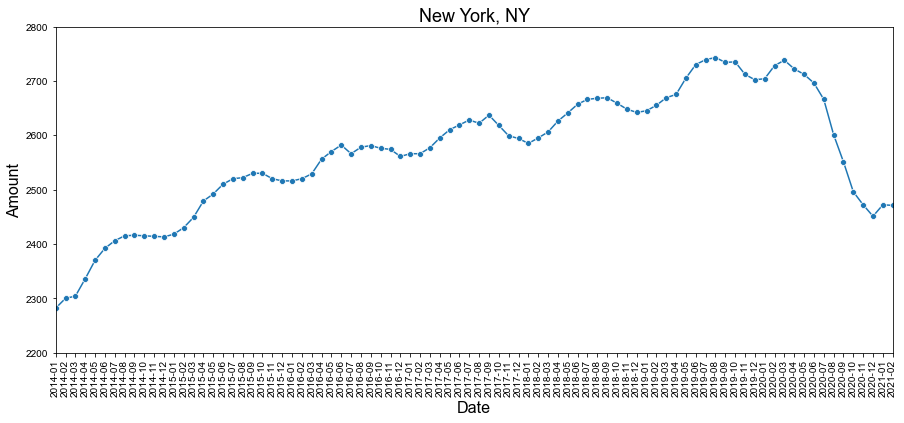

In [17]:
#multiple time series line plots for each region
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[0:86], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(2200,2800) 
plt.xticks(rotation=90) 
plt.title("New York, NY", size=18);

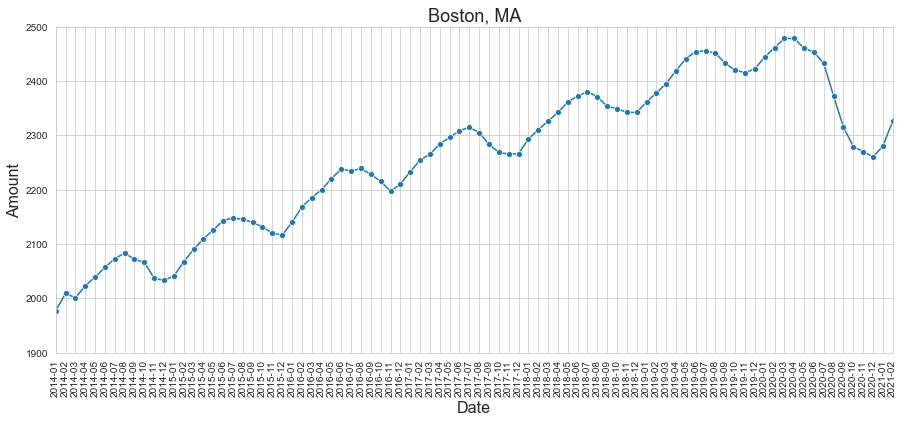

In [18]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[86:172], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1900,2500) 
plt.xticks(rotation=90) 
plt.title("Boston, MA", size=18);

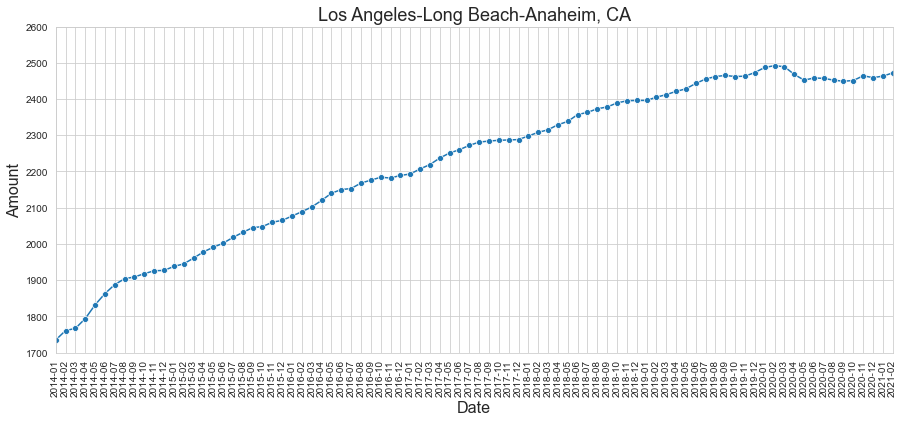

In [19]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[172:258], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1700,2600) 
plt.xticks(rotation=90) 
plt.title("Los Angeles-Long Beach-Anaheim, CA", size=18);

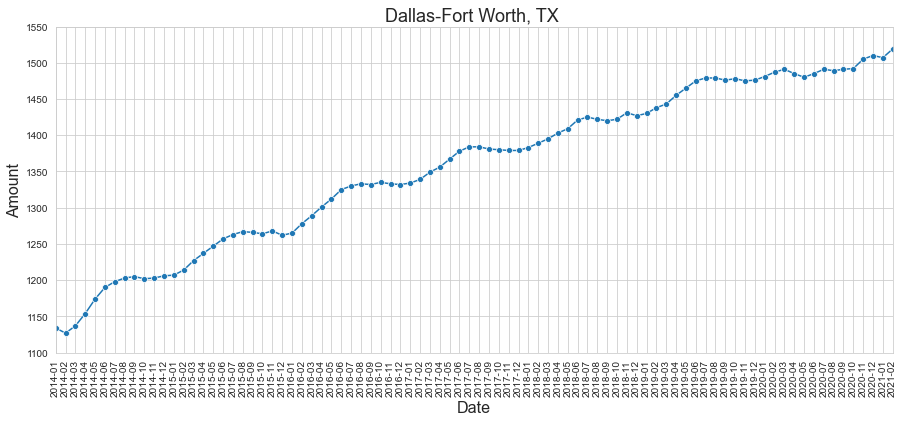

In [20]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[258:344], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1100,1550) 
plt.xticks(rotation=90) 
plt.title("Dallas-Fort Worth, TX ", size=18);

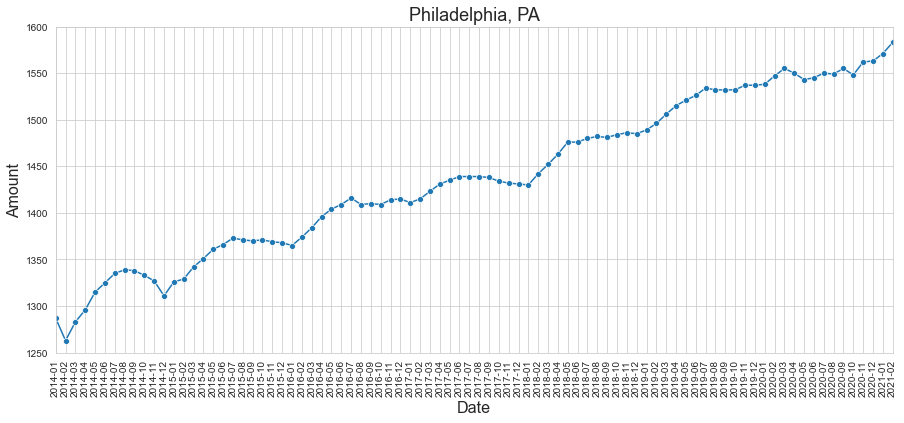

In [21]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[344:430], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1250,1600) 
plt.xticks(rotation=90) 
plt.title("Philadelphia, PA", size=18);

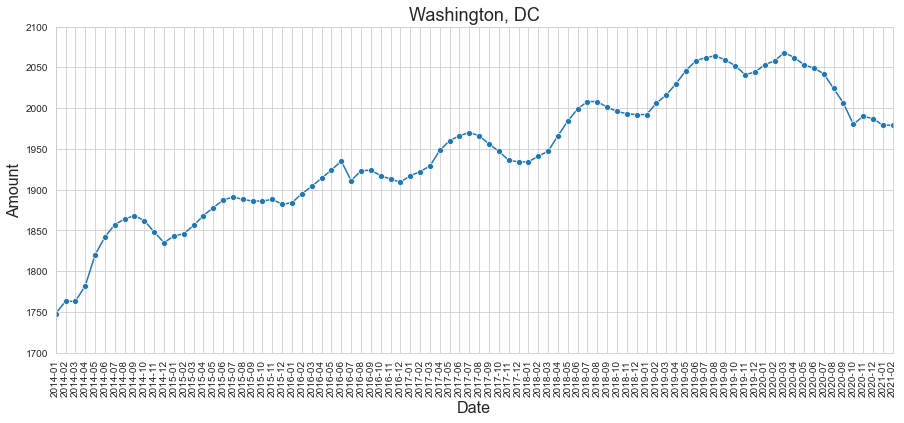

In [22]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[430:516], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1700,2100) 
plt.xticks(rotation=90) 
plt.title("Washington, DC", size=18);

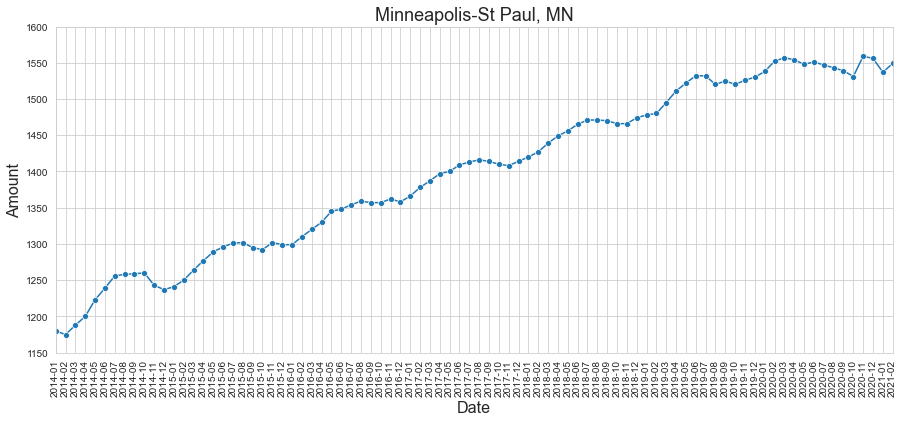

In [23]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[516:602], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1150,1600) 
plt.xticks(rotation=90) 
plt.title("Minneapolis-St Paul, MN", size=18);

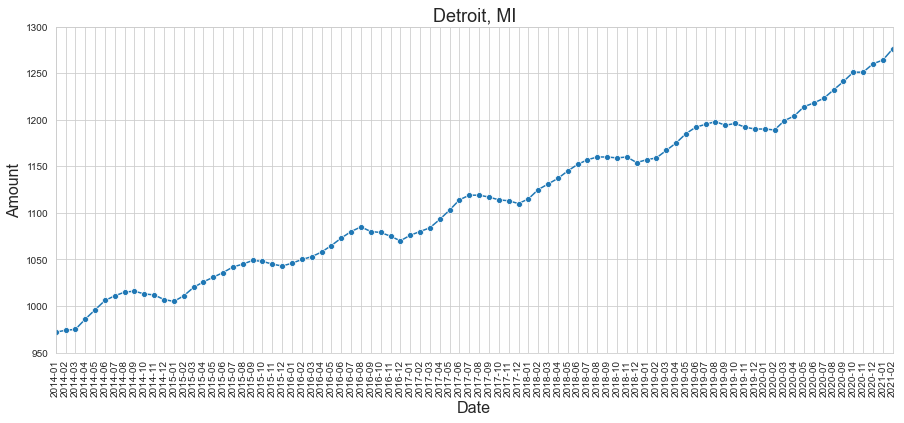

In [24]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[602:688], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(950,1300) 
plt.xticks(rotation=90) 
plt.title("Detroit, MI", size=18);

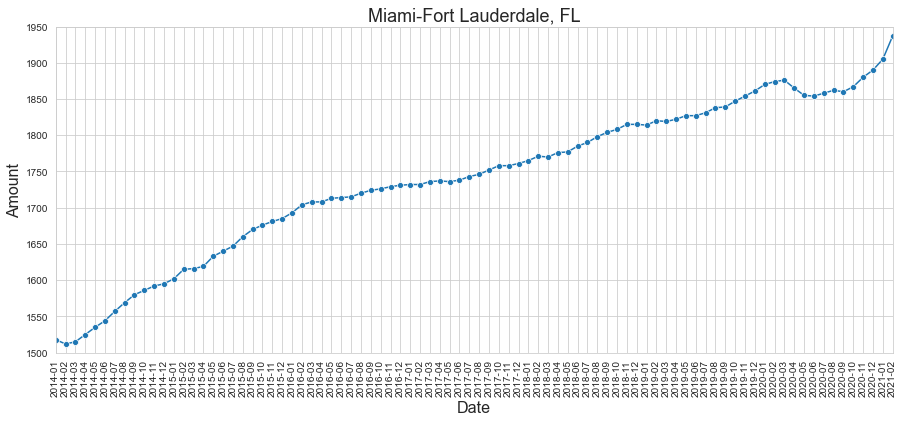

In [25]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[688:774], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1500,1950) 
plt.xticks(rotation=90) 
plt.title("Miami-Fort Lauderdale, FL", size=18);

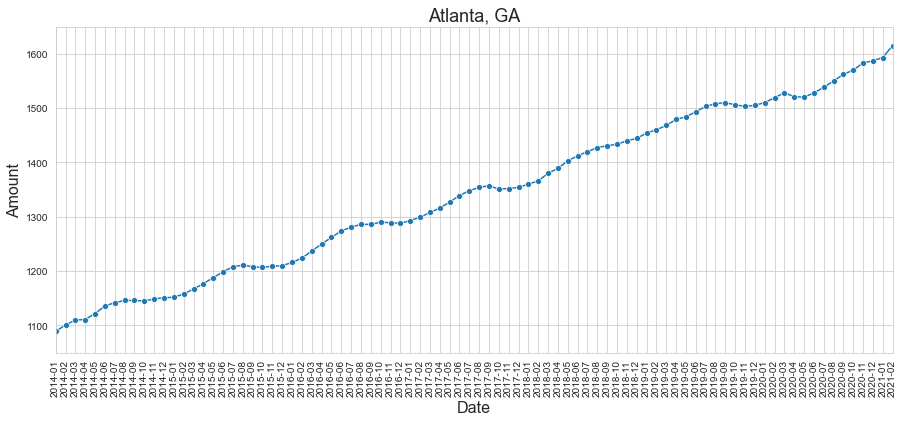

In [26]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[774:860], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1050,1650) 
plt.xticks(rotation=90) 
plt.title("Atlanta, GA", size=18);

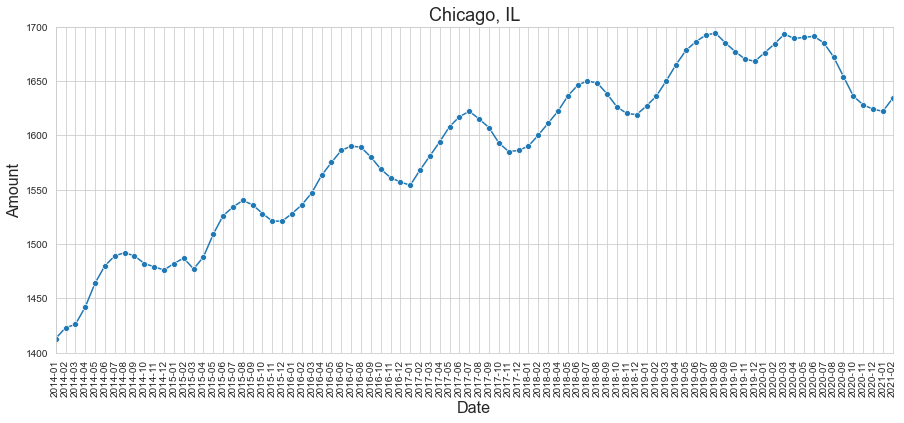

In [27]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[860:946], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1400,1700) 
plt.xticks(rotation=90)
plt.title("Chicago, IL", size=18);

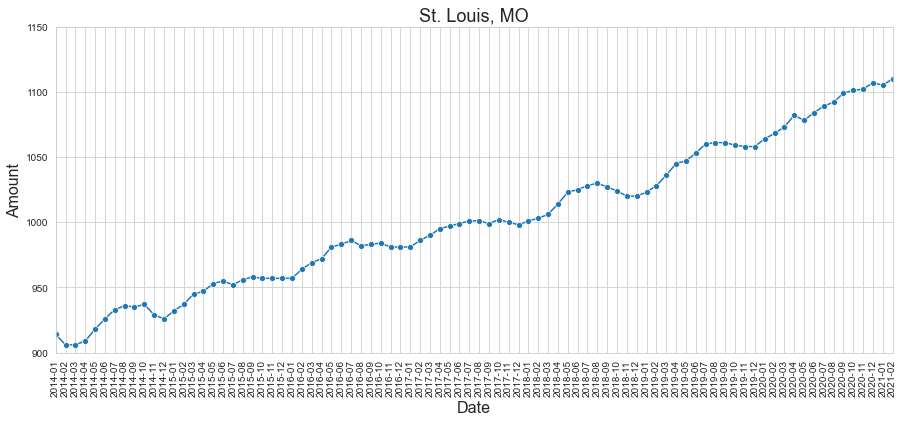

In [28]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[946:1032], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(900,1150) 
plt.xticks(rotation=90)
plt.title("St. Louis, MO", size=18);

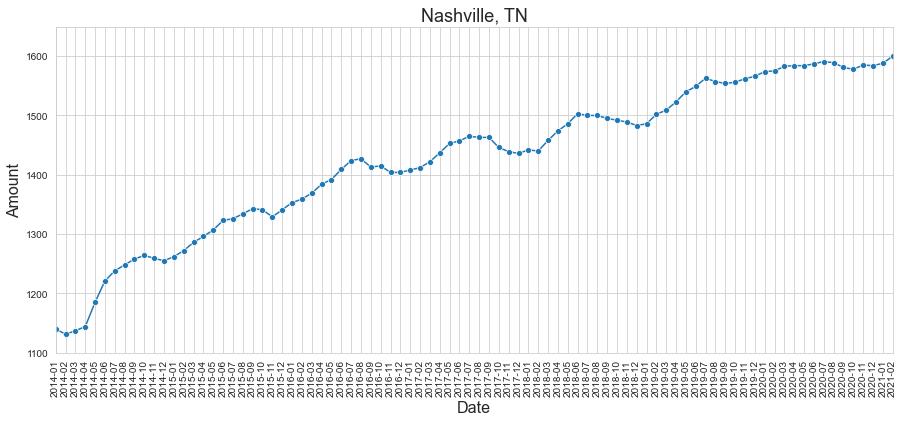

In [29]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[1032:1118], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1100,1650) 
plt.xticks(rotation=90)
plt.title("Nashville, TN", size=18);

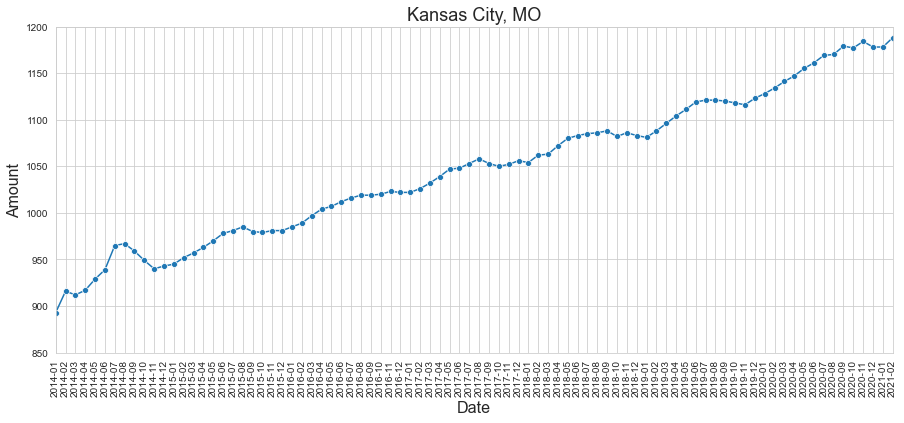

In [30]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[1118:1204], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(850,1200) 
plt.xticks(rotation=90)
plt.title("Kansas City, MO", size=18);

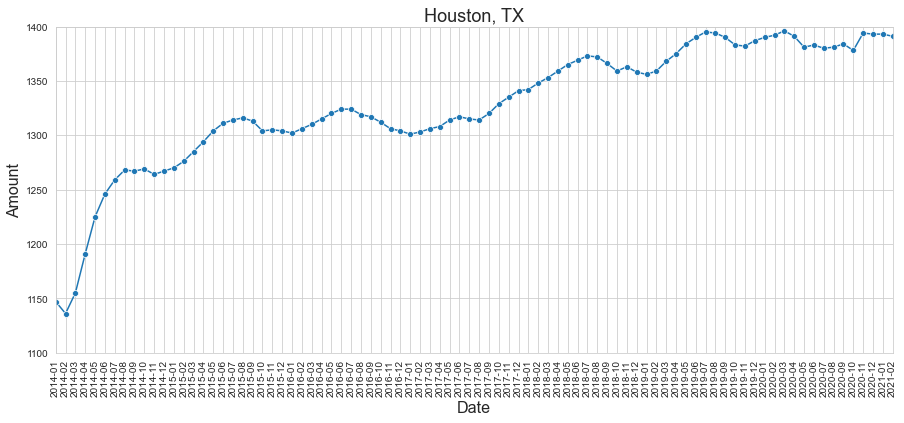

In [31]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[1204:1290], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1100,1400) 
plt.xticks(rotation=90)
plt.title("Houston, TX", size=18);

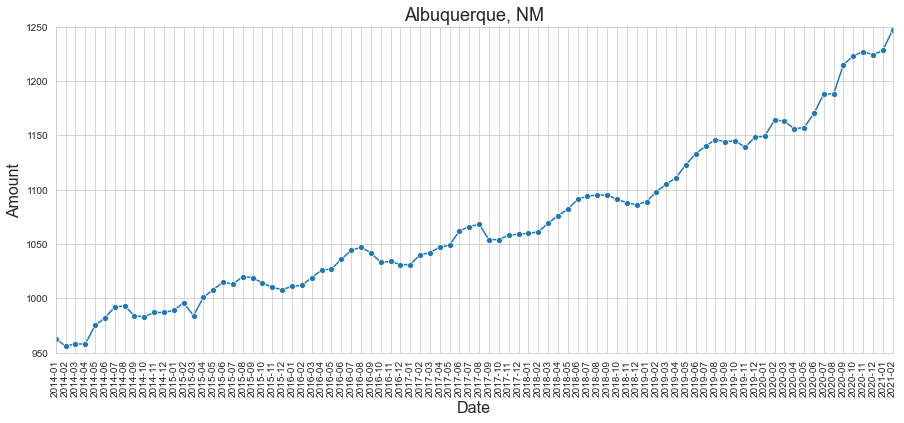

In [32]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[1290:1376], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(950,1250) 
plt.xticks(rotation=90)
plt.title("Albuquerque, NM", size=18);

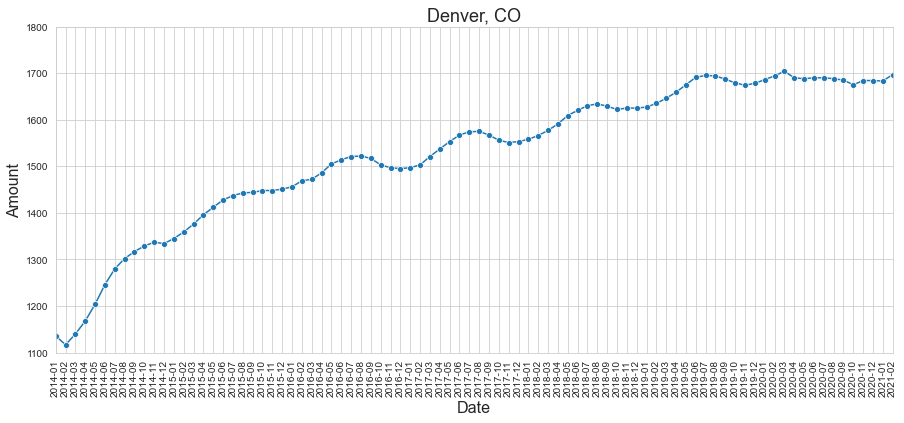

In [33]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[1376:1462], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1100,1800) 
plt.xticks(rotation=90)
plt.title("Denver, CO", size=18);

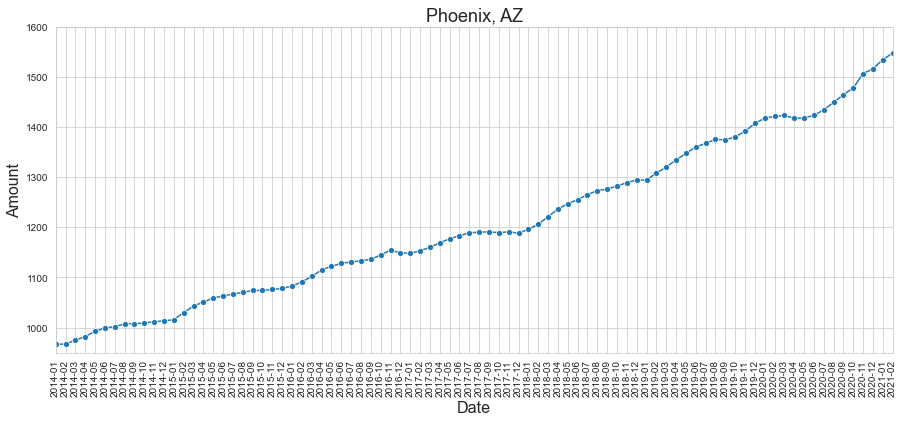

In [34]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[1462:1548], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(950,1600) 
plt.xticks(rotation=90)
plt.title("Phoenix, AZ", size=18);

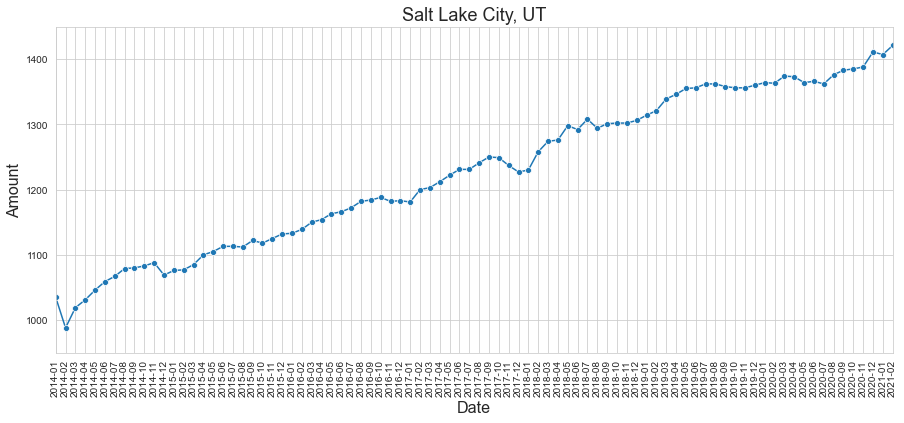

In [35]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[1548:1634], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(950,1450) 
plt.xticks(rotation=90)
plt.title("Salt Lake City, UT", size=18);

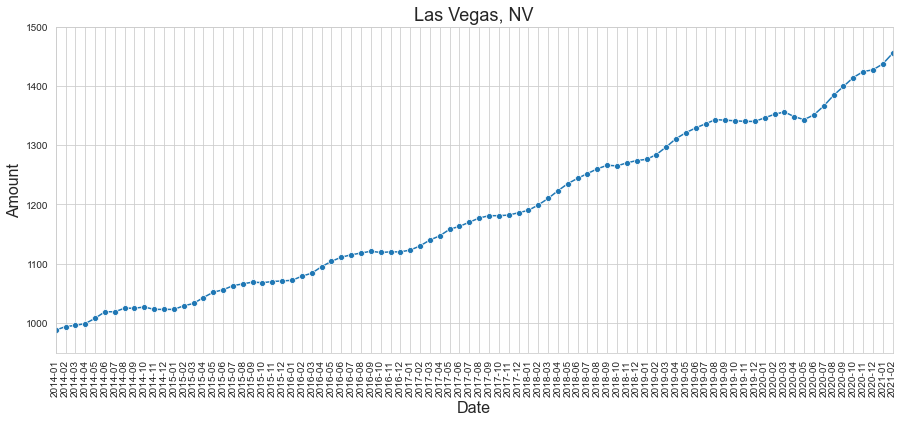

In [36]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[1634:1720], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(950,1500) 
plt.xticks(rotation=90)
plt.title("Las Vegas, NV", size=18);

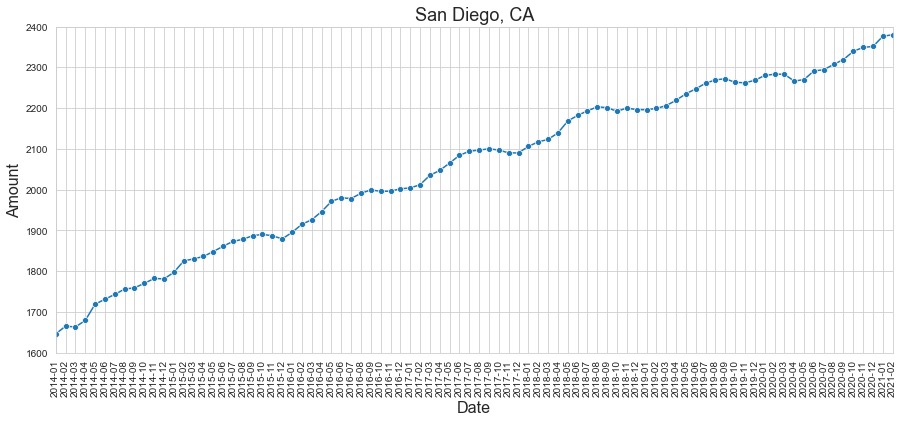

In [37]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[1720:1806], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1600,2400) 
plt.xticks(rotation=90)
plt.title("San Diego, CA", size=18);

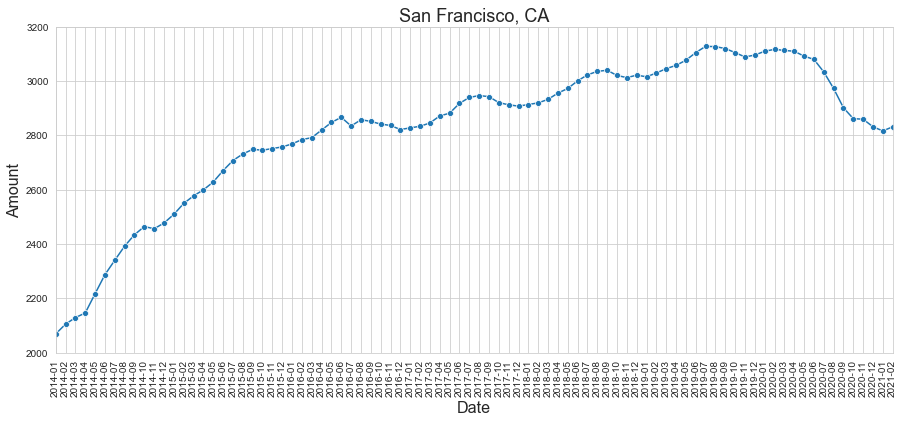

In [38]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[1806:1892], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(2000,3200) 
plt.xticks(rotation=90)
plt.title("San Francisco, CA", size=18);

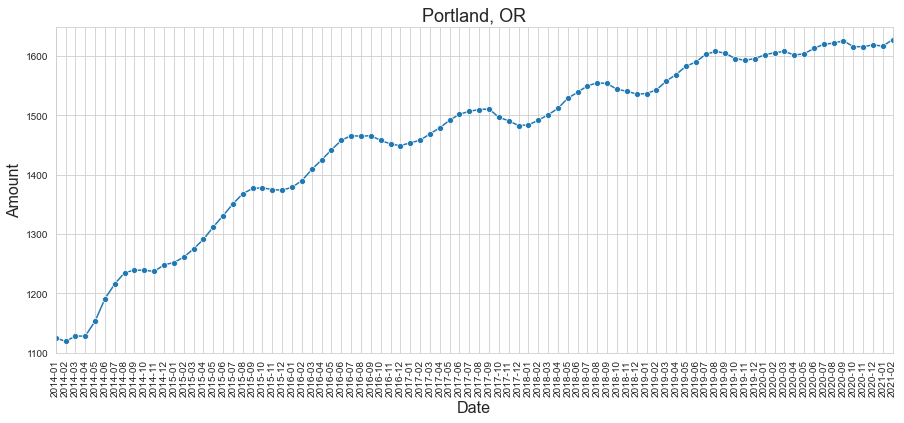

In [39]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[1892:1978], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1100,1650) 
plt.xticks(rotation=90)
plt.title("Portland, OR", size=18);

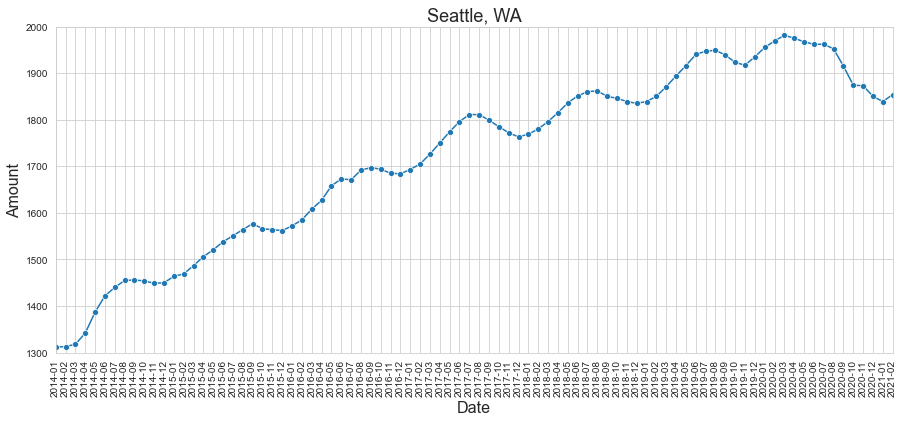

In [40]:
plt.figure(figsize=(15,6))
plt.margins(x=0)
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Amount', data=rent.iloc[1978:2064], marker='o')
plt.xlabel("Date",size=16)
plt.ylabel("Amount",size=16)
plt.ylim(1300,2000) 
plt.xticks(rotation=90)
plt.title("Seattle, WA", size=18);

# Insight 2

In [41]:
#formatting in order to perfrom .pct_change function
rent2=rent.drop(['RegionID', 'SizeRank', 'Rank'], axis=1)
rent2

,Date,Amount
RegionName,,
"New York, NY",2014-01,2282.0
"New York, NY",2014-02,2300.0
"New York, NY",2014-03,2304.0
"New York, NY",2014-04,2336.0
"New York, NY",2014-05,2370.0
...,...,...
"Seattle, WA",2020-10,1874.0
"Seattle, WA",2020-11,1873.0
"Seattle, WA",2020-12,1850.0


In [42]:
#pivoting the date column to prepare for percentage change function
rent3 = rent2.pivot(columns='Date', values='Amount')
rent3

Date,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
RegionName,,,,,,,,,,,,,,,,,,,,,
"Albuquerque, NM",963.0,956.0,958.0,958.0,975.0,982.0,992.0,993.0,984.0,983.0,...,1157.0,1170.0,1188.0,1188.0,1215.0,1223.0,1227.0,1224.0,1228.0,1247.0
"Atlanta, GA",1089.0,1101.0,1110.0,1111.0,1122.0,1136.0,1142.0,1146.0,1146.0,1145.0,...,1520.0,1528.0,1538.0,1550.0,1562.0,1570.0,1583.0,1587.0,1593.0,1615.0
"Boston, MA",1977.0,2009.0,2001.0,2023.0,2039.0,2057.0,2073.0,2083.0,2072.0,2066.0,...,2460.0,2453.0,2432.0,2372.0,2315.0,2279.0,2270.0,2260.0,2280.0,2326.0
"Chicago, IL",1413.0,1423.0,1426.0,1442.0,1464.0,1480.0,1489.0,1492.0,1489.0,1482.0,...,1690.0,1691.0,1685.0,1672.0,1654.0,1636.0,1628.0,1624.0,1622.0,1634.0
"Dallas-Fort Worth, TX",1134.0,1127.0,1137.0,1154.0,1174.0,1190.0,1198.0,1203.0,1205.0,1202.0,...,1480.0,1485.0,1491.0,1489.0,1491.0,1492.0,1505.0,1510.0,1507.0,1519.0
"Denver, CO",1136.0,1117.0,1140.0,1168.0,1204.0,1246.0,1280.0,1302.0,1317.0,1329.0,...,1688.0,1690.0,1690.0,1688.0,1685.0,1675.0,1684.0,1684.0,1683.0,1697.0
"Detroit, MI",972.0,974.0,975.0,986.0,996.0,1006.0,1011.0,1015.0,1016.0,1013.0,...,1214.0,1218.0,1223.0,1232.0,1241.0,1251.0,1251.0,1260.0,1264.0,1276.0
"Houston, TX",1147.0,1136.0,1155.0,1191.0,1225.0,1246.0,1259.0,1268.0,1267.0,1269.0,...,1381.0,1383.0,1380.0,1381.0,1384.0,1378.0,1394.0,1393.0,1393.0,1391.0
"Kansas City, MO",893.0,916.0,912.0,917.0,929.0,939.0,965.0,967.0,959.0,949.0,...,1155.0,1161.0,1169.0,1170.0,1179.0,1177.0,1184.0,1178.0,1178.0,1188.0


In [43]:
#percentage change month-to-month
rent4 = rent3.pct_change(axis='columns') * 100
rent4

Date,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
RegionName,,,,,,,,,,,,,,,,,,,,,
"Albuquerque, NM",NaN,-0.726895,0.209205,0.000000,1.774530,0.717949,1.018330,0.100806,-0.906344,-0.101626,...,0.086505,1.123596,1.538462,0.000000,2.272727,0.658436,0.327065,-0.244499,0.326797,1.547231
"Atlanta, GA",NaN,1.101928,0.817439,0.090090,0.990099,1.247772,0.528169,0.350263,0.000000,-0.087260,...,-0.065746,0.526316,0.654450,0.780234,0.774194,0.512164,0.828025,0.252685,0.378072,1.381042
"Boston, MA",NaN,1.618614,-0.398208,1.099450,0.790905,0.882786,0.777832,0.482393,-0.528084,-0.289575,...,-0.726392,-0.284553,-0.856095,-2.467105,-2.403035,-1.555076,-0.394910,-0.440529,0.884956,2.017544
"Chicago, IL",NaN,0.707714,0.210822,1.122020,1.525659,1.092896,0.608108,0.201478,-0.201072,-0.470114,...,0.059207,0.059172,-0.354820,-0.771513,-1.076555,-1.088271,-0.488998,-0.245700,-0.123153,0.739827
"Dallas-Fort Worth, TX",NaN,-0.617284,0.887311,1.495163,1.733102,1.362862,0.672269,0.417362,0.166251,-0.248963,...,-0.336700,0.337838,0.404040,-0.134138,0.134318,0.067069,0.871314,0.332226,-0.198675,0.796284
"Denver, CO",NaN,-1.672535,2.059087,2.456140,3.082192,3.488372,2.728732,1.718750,1.152074,0.911162,...,-0.118343,0.118483,0.000000,-0.118343,-0.177725,-0.593472,0.537313,0.000000,-0.059382,0.831848
"Detroit, MI",NaN,0.205761,0.102669,1.128205,1.014199,1.004016,0.497018,0.395648,0.098522,-0.295276,...,0.830565,0.329489,0.410509,0.735895,0.730519,0.805802,0.000000,0.719424,0.317460,0.949367
"Houston, TX",NaN,-0.959024,1.672535,3.116883,2.854744,1.714286,1.043339,0.714853,-0.078864,0.157853,...,-0.718907,0.144823,-0.216920,0.072464,0.217234,-0.433526,1.161103,-0.071736,0.000000,-0.143575
"Kansas City, MO",NaN,2.575588,-0.436681,0.548246,1.308615,1.076426,2.768903,0.207254,-0.827301,-1.042753,...,0.697472,0.519481,0.689061,0.085543,0.769231,-0.169635,0.594732,-0.506757,0.000000,0.848896


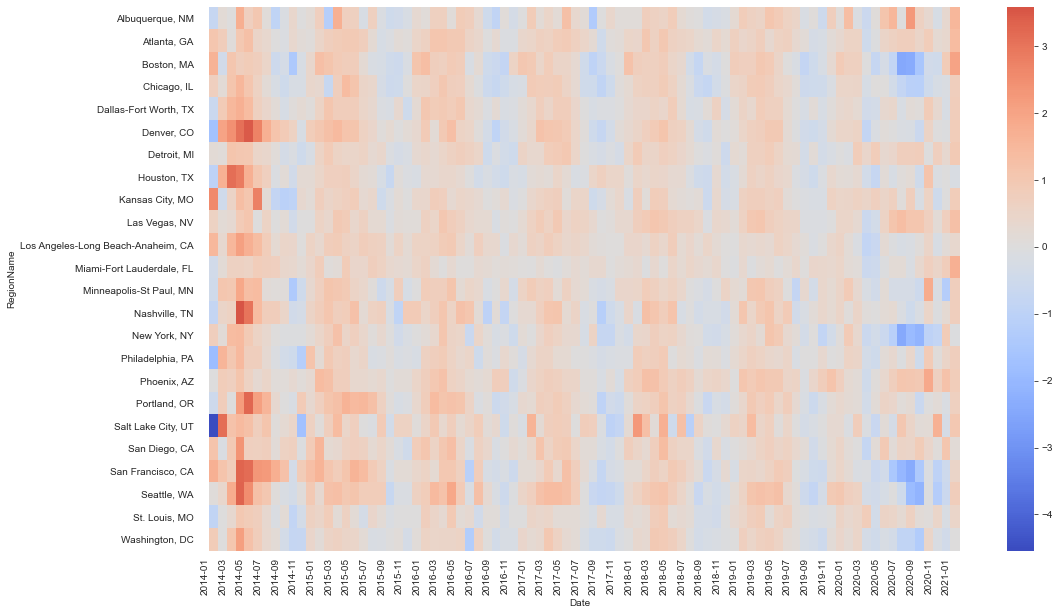

In [44]:
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.heatmap(rent4, cmap="coolwarm", center=0)

In [45]:
def pct_change(rent):
        rent['Amount'] = 100 * (1 - rent.iloc[0].Amount / rent.Amount)
        return rent

rent5 = rent.groupby('RegionName').apply(pct_change)

rent5

,RegionID,SizeRank,Date,Amount,Rank
RegionName,,,,,
"New York, NY",394913,1,2014-01,0.000000,High
"New York, NY",394913,1,2014-02,0.782609,High
"New York, NY",394913,1,2014-03,0.954861,High
"New York, NY",394913,1,2014-04,2.311644,High
"New York, NY",394913,1,2014-05,3.713080,High
...,...,...,...,...,...
"Seattle, WA",395078,15,2020-10,29.989328,High
"Seattle, WA",395078,15,2020-11,29.951949,High
"Seattle, WA",395078,15,2020-12,29.081081,High


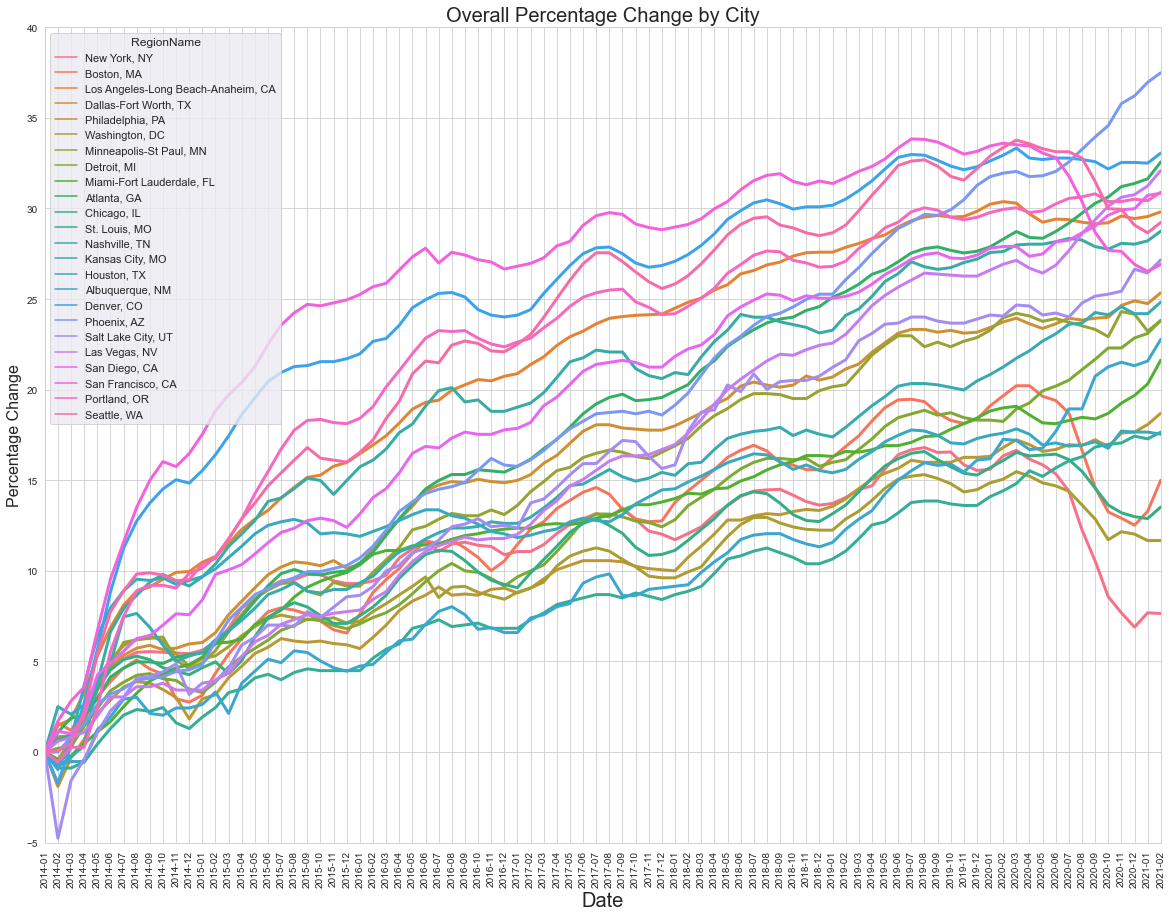

In [46]:
plt.figure(figsize=(20,15))
plt.margins(x=0)
sns.set_theme(style="darkgrid")
sns.lineplot(x='Date', y='Amount', data=rent5, hue="RegionName", legend="auto", lw=3)
plt.xlabel("Date",size=20)
plt.ylabel("Percentage Change",size=16)
plt.ylim(-5, 40) 
plt.xticks(rotation=90)
plt.title("Overall Percentage Change by City", size=20);

In [47]:
#pivoting for percentage change month-to-month for overall
rent6 = rent5.pivot(columns='Date', values='Amount')
rent6

Date,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
RegionName,,,,,,,,,,,,,,,,,,,,,
"Albuquerque, NM",0.0,-0.732218,-0.521921,-0.521921,1.230769,1.934827,2.923387,3.021148,2.134146,2.034588,...,16.767502,17.692308,18.939394,18.939394,20.740741,21.259199,21.515892,21.323529,21.579805,22.774659
"Atlanta, GA",0.0,1.089918,1.891892,1.980198,2.941176,4.137324,4.640981,4.973822,4.973822,4.890830,...,28.355263,28.730366,29.193758,29.741935,30.281690,30.636943,31.206570,31.379962,31.638418,32.569659
"Boston, MA",0.0,1.592832,1.199400,2.273851,3.040706,3.889159,4.630970,5.088814,4.584942,4.307841,...,19.634146,19.404810,18.708882,16.652614,14.600432,13.251426,12.907489,12.522124,13.289474,15.004299
"Chicago, IL",0.0,0.702741,0.911641,2.011096,3.483607,4.527027,5.104097,5.294906,5.104097,4.655870,...,16.390533,16.439976,16.142433,15.490431,14.570738,13.630807,13.206388,12.992611,12.885327,13.525092
"Dallas-Fort Worth, TX",0.0,-0.621118,0.263852,1.733102,3.407155,4.705882,5.342237,5.735661,5.892116,5.657238,...,23.378378,23.636364,23.943662,23.841504,23.943662,23.994638,24.651163,24.900662,24.751161,25.345622
"Denver, CO",0.0,-1.700985,0.350877,2.739726,5.647841,8.828250,11.250000,12.749616,13.743356,14.522197,...,32.701422,32.781065,32.781065,32.701422,32.581602,32.179104,32.541568,32.541568,32.501485,33.058338
"Detroit, MI",0.0,0.205339,0.307692,1.419878,2.409639,3.379722,3.857567,4.236453,4.330709,4.047384,...,19.934102,20.197044,20.523303,21.103896,21.676068,22.302158,22.302158,22.857143,23.101266,23.824451
"Houston, TX",0.0,-0.968310,0.692641,3.694374,6.367347,7.945425,8.895949,9.542587,9.471192,9.613869,...,16.944243,17.064353,16.884058,16.944243,17.124277,16.763425,17.718795,17.659727,17.659727,17.541337
"Kansas City, MO",0.0,2.510917,2.083333,2.617230,3.875135,4.898829,7.461140,7.652534,6.882169,5.900948,...,22.683983,23.083549,23.609923,23.675214,24.257846,24.129142,24.577703,24.193548,24.193548,24.831650


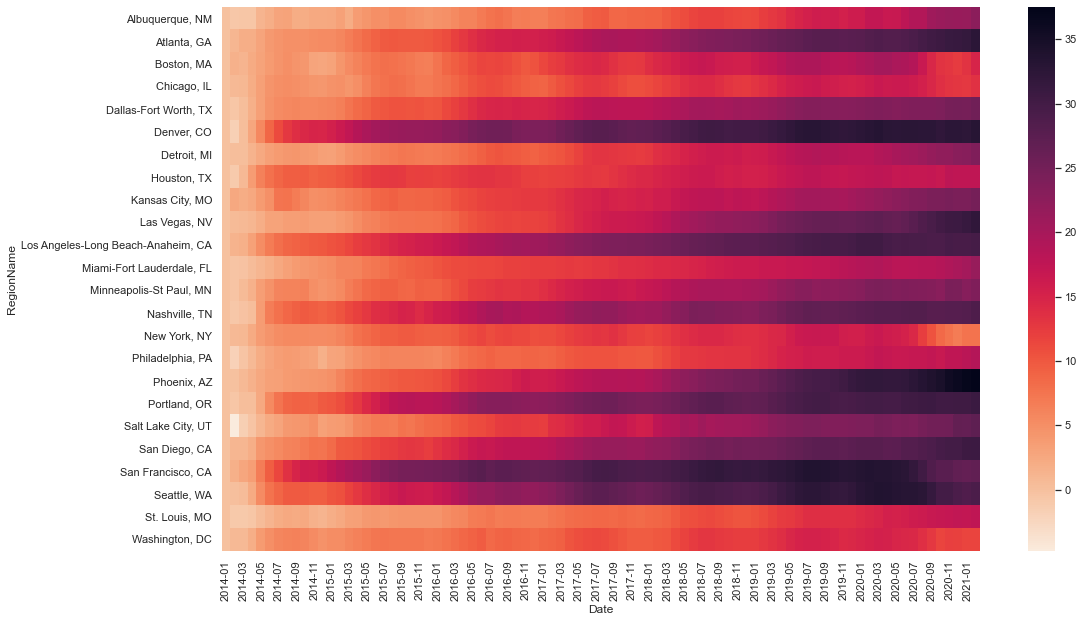

In [48]:
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.heatmap(rent6, cmap="rocket_r")

In [49]:
#median income by region adjusted for inflation according to the Consumer Price Index
df3 = df3.set_index('RegionName')
median_income = df3.loc[["New York, NY", "Boston, MA", "Los Angeles-Long Beach-Anaheim, CA", "Dallas-Fort Worth, TX", 
                       "Philadelphia, PA", "Washington, DC", "Minneapolis-St Paul, MN", "Detroit, MI",
                       "Miami-Fort Lauderdale, FL", "Atlanta, GA", "Chicago, IL", "St. Louis, MO", "Nashville, TN",
                       "Kansas City, MO", "Houston, TX", "Albuquerque, NM", "Denver, CO",
                       "Phoenix, AZ", "Salt Lake City, UT", "Las Vegas, NV", "San Diego, CA", "San Francisco, CA", 
                       "Portland, OR", "Seattle, WA"]]

median_income

,MedianIncome2014,MedianIncome2015,MedianIncome2016,MedianIncome2017,MedianIncome2018,MedianIncome2019,MedianIncome2020,MedianIncome2021
RegionName,,,,,,,,
"New York, NY",58878.16,59820.21056,60777.333929,61749.771272,62737.767612,63741.571894,64761.437044,65797.620037
"Boston, MA",65425.80,66472.61280,67536.174605,68616.753398,69714.621453,70830.055396,71963.336282,73114.749663
"Los Angeles-Long Beach-Anaheim, CA",62600.48,63602.08768,64619.721083,65653.636620,66704.094806,67771.360323,68855.702088,69957.393322
"Dallas-Fort Worth, TX",54838.44,55715.85504,56607.308721,57513.025660,58433.234071,59368.165816,60318.056469,61283.145372
"Philadelphia, PA",42252.84,42928.88544,43615.747607,44313.599569,45022.617162,45742.979036,46474.866701,47218.464568
"Washington, DC",79506.40,80778.50240,82070.958438,83384.093773,84718.239274,86073.731102,87450.910800,88850.125373
"Minneapolis-St Paul, MN",55411.60,56298.18560,57198.956570,58114.139875,59043.966113,59988.669571,60948.488284,61923.664096
"Detroit, MI",28422.48,28877.23968,29339.275515,29808.703923,30285.643186,30770.213477,31262.536892,31762.737483
"Miami-Fort Lauderdale, FL",47239.24,47995.06784,48762.988925,49543.196748,50335.887896,51141.262103,51959.522296,52790.874653


In [50]:
#check to see if types match
print(rent3.dtypes)
print(median_income.dtypes)

Date
2014-01    float64
2014-02    float64
2014-03    float64
2014-04    float64
2014-05    float64
            ...   
2020-10    float64
2020-11    float64
2020-12    float64
2021-01    float64
2021-02    float64
Length: 86, dtype: object
MedianIncome2014    float64
MedianIncome2015    float64
MedianIncome2016    float64
MedianIncome2017    float64
MedianIncome2018    float64
MedianIncome2019    float64
MedianIncome2020    float64
MedianIncome2021    float64
dtype: object


In [51]:
#change the date column to datetime
rent2["Date"]= pd.to_datetime(rent2["Date"])
rent2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2064 entries, New York, NY to Seattle, WA
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2064 non-null   datetime64[ns]
 1   Amount  2064 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.4+ KB


In [52]:
#formatting in order to perfrom Income:Rent ratio analysis
median_income2=median_income.drop(['MedianIncome2021'], axis=1)
median_income2

,MedianIncome2014,MedianIncome2015,MedianIncome2016,MedianIncome2017,MedianIncome2018,MedianIncome2019,MedianIncome2020
RegionName,,,,,,,
"New York, NY",58878.16,59820.21056,60777.333929,61749.771272,62737.767612,63741.571894,64761.437044
"Boston, MA",65425.80,66472.61280,67536.174605,68616.753398,69714.621453,70830.055396,71963.336282
"Los Angeles-Long Beach-Anaheim, CA",62600.48,63602.08768,64619.721083,65653.636620,66704.094806,67771.360323,68855.702088
"Dallas-Fort Worth, TX",54838.44,55715.85504,56607.308721,57513.025660,58433.234071,59368.165816,60318.056469
"Philadelphia, PA",42252.84,42928.88544,43615.747607,44313.599569,45022.617162,45742.979036,46474.866701
"Washington, DC",79506.40,80778.50240,82070.958438,83384.093773,84718.239274,86073.731102,87450.910800
"Minneapolis-St Paul, MN",55411.60,56298.18560,57198.956570,58114.139875,59043.966113,59988.669571,60948.488284
"Detroit, MI",28422.48,28877.23968,29339.275515,29808.703923,30285.643186,30770.213477,31262.536892
"Miami-Fort Lauderdale, FL",47239.24,47995.06784,48762.988925,49543.196748,50335.887896,51141.262103,51959.522296


In [53]:
median2=median_income.reset_index()
median2

,RegionName,MedianIncome2014,MedianIncome2015,MedianIncome2016,MedianIncome2017,MedianIncome2018,MedianIncome2019,MedianIncome2020,MedianIncome2021
0,"New York, NY",58878.16,59820.21056,60777.333929,61749.771272,62737.767612,63741.571894,64761.437044,65797.620037
1,"Boston, MA",65425.80,66472.61280,67536.174605,68616.753398,69714.621453,70830.055396,71963.336282,73114.749663
2,"Los Angeles-Long Beach-Anaheim, CA",62600.48,63602.08768,64619.721083,65653.636620,66704.094806,67771.360323,68855.702088,69957.393322
3,"Dallas-Fort Worth, TX",54838.44,55715.85504,56607.308721,57513.025660,58433.234071,59368.165816,60318.056469,61283.145372
4,"Philadelphia, PA",42252.84,42928.88544,43615.747607,44313.599569,45022.617162,45742.979036,46474.866701,47218.464568
5,"Washington, DC",79506.40,80778.50240,82070.958438,83384.093773,84718.239274,86073.731102,87450.910800,88850.125373
6,"Minneapolis-St Paul, MN",55411.60,56298.18560,57198.956570,58114.139875,59043.966113,59988.669571,60948.488284,61923.664096
7,"Detroit, MI",28422.48,28877.23968,29339.275515,29808.703923,30285.643186,30770.213477,31262.536892,31762.737483
8,"Miami-Fort Lauderdale, FL",47239.24,47995.06784,48762.988925,49543.196748,50335.887896,51141.262103,51959.522296,52790.874653
9,"Atlanta, GA",55152.16,56034.59456,56931.148073,57842.046442,58767.519185,59707.799492,60663.124284,61633.734273


In [54]:
median2.sort_values('RegionName')

,RegionName,MedianIncome2014,MedianIncome2015,MedianIncome2016,MedianIncome2017,MedianIncome2018,MedianIncome2019,MedianIncome2020,MedianIncome2021
15,"Albuquerque, NM",48678.12,49456.96992,50248.281439,51052.253942,51869.090005,52698.995445,53542.179372,54398.854242
9,"Atlanta, GA",55152.16,56034.59456,56931.148073,57842.046442,58767.519185,59707.799492,60663.124284,61633.734273
1,"Boston, MA",65425.80,66472.61280,67536.174605,68616.753398,69714.621453,70830.055396,71963.336282,73114.749663
10,"Chicago, IL",53587.24,54444.63584,55315.750013,56200.802014,57100.014846,58013.615083,58941.832925,59884.902252
3,"Dallas-Fort Worth, TX",54838.44,55715.85504,56607.308721,57513.025660,58433.234071,59368.165816,60318.056469,61283.145372
16,"Denver, CO",63104.64,64114.31424,65140.143268,66182.385560,67241.303729,68317.164589,69410.239222,70520.803050
7,"Detroit, MI",28422.48,28877.23968,29339.275515,29808.703923,30285.643186,30770.213477,31262.536892,31762.737483
14,"Houston, TX",48150.96,48921.37536,49704.117366,50499.383244,51307.373376,52128.291350,52962.344011,53809.741515
13,"Kansas City, MO",49858.48,50656.21568,51466.715131,52290.182573,53126.825494,53976.854702,54840.484377,55717.932127
19,"Las Vegas, NV",51845.68,52675.21088,53518.014254,54374.302482,55244.291322,56128.199983,57026.251183,57938.671202


In [55]:
median2 = median2.sort_values(by=['RegionName'],ignore_index=True)
median2

,RegionName,MedianIncome2014,MedianIncome2015,MedianIncome2016,MedianIncome2017,MedianIncome2018,MedianIncome2019,MedianIncome2020,MedianIncome2021
0,"Albuquerque, NM",48678.12,49456.96992,50248.281439,51052.253942,51869.090005,52698.995445,53542.179372,54398.854242
1,"Atlanta, GA",55152.16,56034.59456,56931.148073,57842.046442,58767.519185,59707.799492,60663.124284,61633.734273
2,"Boston, MA",65425.80,66472.61280,67536.174605,68616.753398,69714.621453,70830.055396,71963.336282,73114.749663
3,"Chicago, IL",53587.24,54444.63584,55315.750013,56200.802014,57100.014846,58013.615083,58941.832925,59884.902252
4,"Dallas-Fort Worth, TX",54838.44,55715.85504,56607.308721,57513.025660,58433.234071,59368.165816,60318.056469,61283.145372
5,"Denver, CO",63104.64,64114.31424,65140.143268,66182.385560,67241.303729,68317.164589,69410.239222,70520.803050
6,"Detroit, MI",28422.48,28877.23968,29339.275515,29808.703923,30285.643186,30770.213477,31262.536892,31762.737483
7,"Houston, TX",48150.96,48921.37536,49704.117366,50499.383244,51307.373376,52128.291350,52962.344011,53809.741515
8,"Kansas City, MO",49858.48,50656.21568,51466.715131,52290.182573,53126.825494,53976.854702,54840.484377,55717.932127
9,"Las Vegas, NV",51845.68,52675.21088,53518.014254,54374.302482,55244.291322,56128.199983,57026.251183,57938.671202


In [56]:
median2=median2.drop(columns=['MedianIncome2021'])
median2

,RegionName,MedianIncome2014,MedianIncome2015,MedianIncome2016,MedianIncome2017,MedianIncome2018,MedianIncome2019,MedianIncome2020
0,"Albuquerque, NM",48678.12,49456.96992,50248.281439,51052.253942,51869.090005,52698.995445,53542.179372
1,"Atlanta, GA",55152.16,56034.59456,56931.148073,57842.046442,58767.519185,59707.799492,60663.124284
2,"Boston, MA",65425.80,66472.61280,67536.174605,68616.753398,69714.621453,70830.055396,71963.336282
3,"Chicago, IL",53587.24,54444.63584,55315.750013,56200.802014,57100.014846,58013.615083,58941.832925
4,"Dallas-Fort Worth, TX",54838.44,55715.85504,56607.308721,57513.025660,58433.234071,59368.165816,60318.056469
5,"Denver, CO",63104.64,64114.31424,65140.143268,66182.385560,67241.303729,68317.164589,69410.239222
6,"Detroit, MI",28422.48,28877.23968,29339.275515,29808.703923,30285.643186,30770.213477,31262.536892
7,"Houston, TX",48150.96,48921.37536,49704.117366,50499.383244,51307.373376,52128.291350,52962.344011
8,"Kansas City, MO",49858.48,50656.21568,51466.715131,52290.182573,53126.825494,53976.854702,54840.484377
9,"Las Vegas, NV",51845.68,52675.21088,53518.014254,54374.302482,55244.291322,56128.199983,57026.251183


In [57]:
df4.dtypes

RegionName    object
2014           int64
2015           int64
2016           int64
2017           int64
2018           int64
2019           int64
2020           int64
dtype: object

In [58]:
median2 = median2.set_index('RegionName')
median2

,MedianIncome2014,MedianIncome2015,MedianIncome2016,MedianIncome2017,MedianIncome2018,MedianIncome2019,MedianIncome2020
RegionName,,,,,,,
"Albuquerque, NM",48678.12,49456.96992,50248.281439,51052.253942,51869.090005,52698.995445,53542.179372
"Atlanta, GA",55152.16,56034.59456,56931.148073,57842.046442,58767.519185,59707.799492,60663.124284
"Boston, MA",65425.80,66472.61280,67536.174605,68616.753398,69714.621453,70830.055396,71963.336282
"Chicago, IL",53587.24,54444.63584,55315.750013,56200.802014,57100.014846,58013.615083,58941.832925
"Dallas-Fort Worth, TX",54838.44,55715.85504,56607.308721,57513.025660,58433.234071,59368.165816,60318.056469
"Denver, CO",63104.64,64114.31424,65140.143268,66182.385560,67241.303729,68317.164589,69410.239222
"Detroit, MI",28422.48,28877.23968,29339.275515,29808.703923,30285.643186,30770.213477,31262.536892
"Houston, TX",48150.96,48921.37536,49704.117366,50499.383244,51307.373376,52128.291350,52962.344011
"Kansas City, MO",49858.48,50656.21568,51466.715131,52290.182573,53126.825494,53976.854702,54840.484377


In [59]:
df4 = df4.set_index('RegionName')
df4

,2014,2015,2016,2017,2018,2019,2020
RegionName,,,,,,,
"Albuquerque, NM",11718,12077,12362,12630,12988,13521,14224
"Atlanta, GA",13548,14294,15183,15998,16905,17873,18516
"Boston, MA",24470,25376,26474,27343,28141,29043,28702
"Chicago, IL",17555,18149,18781,19130,19506,20028,20022
"Dallas-Fort Worth, TX",14133,14979,15765,16410,16947,17569,17887
"Denver, CO",14910,16987,17957,18554,19286,20040,20258
"Detroit, MI",11983,12401,12814,13242,13755,14200,14672
"Houston, TX",14694,15596,15759,15803,16327,16563,16643
"Kansas City, MO",11229,11652,12113,12536,12924,13318,13923


# Insight 3

In [60]:
#divide yearly rental averages by median incomes to get Rent:Income ratios for each region
rent_income = np.divide(df4, median2) * 100
rent_income

,2014,2015,2016,2017,2018,2019,2020
RegionName,,,,,,,
"Albuquerque, NM",24.072417,24.419207,24.601836,24.739358,25.039961,25.657036,26.565971
"Atlanta, GA",24.564768,25.509241,26.669056,27.658081,28.765890,29.934113,30.522661
"Boston, MA",37.401148,38.175120,39.199733,39.848869,40.365994,41.003780,39.884199
"Chicago, IL",32.759664,33.334781,33.952355,34.038660,34.161112,34.522930,33.969083
"Dallas-Fort Worth, TX",25.772068,26.884627,27.849761,28.532667,29.002331,29.593301,29.654470
"Denver, CO",23.627423,26.494863,27.566719,28.034650,28.681776,29.333770,29.185896
"Detroit, MI",42.160290,42.943855,43.675243,44.423267,45.417559,46.148526,46.931572
"Houston, TX",30.516526,31.879725,31.705623,31.293451,31.821937,31.773533,31.424213
"Kansas City, MO",22.521746,23.002113,23.535600,23.973907,24.326693,24.673538,25.388178


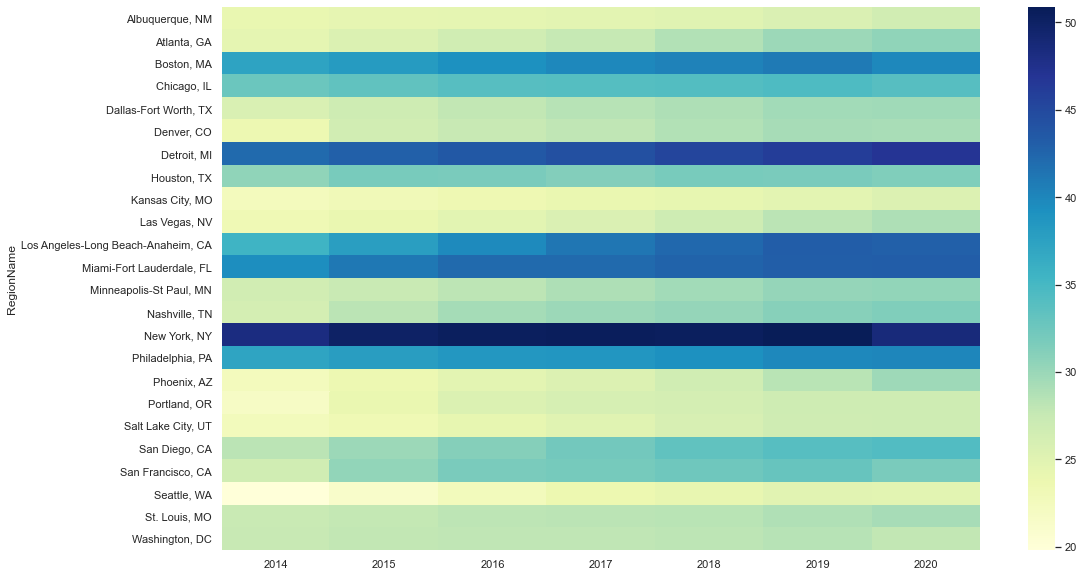

In [61]:
#plot rent:income ratio by year
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.heatmap(rent_income, cmap="YlGnBu")

In [62]:
rent_income = rent_income.reset_index()
rent_income

,RegionName,2014,2015,2016,2017,2018,2019,2020
0,"Albuquerque, NM",24.072417,24.419207,24.601836,24.739358,25.039961,25.657036,26.565971
1,"Atlanta, GA",24.564768,25.509241,26.669056,27.658081,28.765890,29.934113,30.522661
2,"Boston, MA",37.401148,38.175120,39.199733,39.848869,40.365994,41.003780,39.884199
3,"Chicago, IL",32.759664,33.334781,33.952355,34.038660,34.161112,34.522930,33.969083
4,"Dallas-Fort Worth, TX",25.772068,26.884627,27.849761,28.532667,29.002331,29.593301,29.654470
5,"Denver, CO",23.627423,26.494863,27.566719,28.034650,28.681776,29.333770,29.185896
6,"Detroit, MI",42.160290,42.943855,43.675243,44.423267,45.417559,46.148526,46.931572
7,"Houston, TX",30.516526,31.879725,31.705623,31.293451,31.821937,31.773533,31.424213
8,"Kansas City, MO",22.521746,23.002113,23.535600,23.973907,24.326693,24.673538,25.388178
9,"Las Vegas, NV",23.427217,24.001802,24.772967,25.633432,26.949391,28.256741,28.951579


In [63]:
rent_income = rent_income.assign(lat = ['35.0844','33.749','42.3601','41.8781','32.7079','39.7392','42.3314',
                                        '29.7604','39.0997','36.1699','34.0522','26.3014','44.9375','36.1627',
                                        '40.7128','39.9526','33.4484','45.5051','40.7608','32.7157','37.7749','47.6062',
                                        '38.627','38.9072'])

In [64]:
rent_income = rent_income.assign(lon = ['-106.6504','-84.388','-71.0589','-87.6298','-96.9209','-104.9903','-83.0458',
                                        '-95.3698','-94.5786','-115.1398','-118.2437','-80.6327','-93.201','-86.7816',
                                        '-74.006','-75.1652','-112.074','-122.675','-111.891','-117.1611','-122.4194',
                                        '-122.3321','-90.1994','-77.0369'])

In [65]:
#with latitude and longitude for Plotly
rent_income

,RegionName,2014,2015,2016,2017,2018,2019,2020,lat,lon
0,"Albuquerque, NM",24.072417,24.419207,24.601836,24.739358,25.039961,25.657036,26.565971,35.0844,-106.6504
1,"Atlanta, GA",24.564768,25.509241,26.669056,27.658081,28.765890,29.934113,30.522661,33.749,-84.388
2,"Boston, MA",37.401148,38.175120,39.199733,39.848869,40.365994,41.003780,39.884199,42.3601,-71.0589
3,"Chicago, IL",32.759664,33.334781,33.952355,34.038660,34.161112,34.522930,33.969083,41.8781,-87.6298
4,"Dallas-Fort Worth, TX",25.772068,26.884627,27.849761,28.532667,29.002331,29.593301,29.654470,32.7079,-96.9209
5,"Denver, CO",23.627423,26.494863,27.566719,28.034650,28.681776,29.333770,29.185896,39.7392,-104.9903
6,"Detroit, MI",42.160290,42.943855,43.675243,44.423267,45.417559,46.148526,46.931572,42.3314,-83.0458
7,"Houston, TX",30.516526,31.879725,31.705623,31.293451,31.821937,31.773533,31.424213,29.7604,-95.3698
8,"Kansas City, MO",22.521746,23.002113,23.535600,23.973907,24.326693,24.673538,25.388178,39.0997,-94.5786
9,"Las Vegas, NV",23.427217,24.001802,24.772967,25.633432,26.949391,28.256741,28.951579,36.1699,-115.1398


In [66]:
rent_income2=rent_income.melt(['RegionName', 'lat', 'lon'], var_name='Date')
rent_income2=rent_income2.rename(columns={'value':'Rent_Income_Ratio'}, inplace=False)

rent_income2

,RegionName,lat,lon,Date,Rent_Income_Ratio
0,"Albuquerque, NM",35.0844,-106.6504,2014,24.072417
1,"Atlanta, GA",33.749,-84.388,2014,24.564768
2,"Boston, MA",42.3601,-71.0589,2014,37.401148
3,"Chicago, IL",41.8781,-87.6298,2014,32.759664
4,"Dallas-Fort Worth, TX",32.7079,-96.9209,2014,25.772068
...,...,...,...,...,...
163,"San Diego, CA",32.7157,-117.1611,2020,34.272917
164,"San Francisco, CA",37.7749,-122.4194,2020,31.701265
165,"Seattle, WA",47.6062,-122.3321,2020,24.886569
166,"St. Louis, MO",38.627,-90.1994,2020,29.354133


In [73]:
fig = px.scatter_geo(rent_income2,
               locationmode = 'USA-states',
               lat="lat", 
               lon="lon",
               color="Rent_Income_Ratio",
               size="Rent_Income_Ratio",
               animation_frame="Date",
               color_continuous_scale="icefire",
               hover_name="RegionName",
               scope="usa",
               range_color=(0, 52),
               title='Rent:Income by City and Year',
               height=750
              )

fig.show()

In [81]:
username = 'roryadair' # your username
api_key = 's5rxZ35d7rB31kbyKL5q' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username='roryadair', api_key='s5rxZ35d7rB31kbyKL5q')

In [82]:
import chart_studio.plotly as pyc
pyc.plot(fig, filename = 'rent_income', auto_open=True)

'https://plotly.com/~roryadair/1/'

In [84]:
import chart_studio.tools as tls
tls.get_embed('https://plotly.com/~roryadair/1/') #change to your url

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~roryadair/1.embed" height="525" width="100%"></iframe>'

In [85]:
'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~roryadair/1.embed" height="525" width="100%"></iframe>'

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~roryadair/1.embed" height="525" width="100%"></iframe>'

Insights